In [13]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [14]:
from sklearn.model_selection import KFold
from tensorflow.keras.losses import CategoricalCrossentropy

In [2]:
file_path = '/content/sample_data/age_gender.csv'

age_gender = pd.read_csv(file_path)

# Display the first few rows of the dataset
age_gender.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [3]:
age_gender['pixels'] = age_gender['pixels'].apply(lambda x: np.array(x.split(), dtype="float32"))
age_gender.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,"[129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 133..."
1,1,2,0,20161219222752047.jpg.chip.jpg,"[164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175...."
2,1,2,0,20161219222832191.jpg.chip.jpg,"[67.0, 70.0, 71.0, 70.0, 69.0, 67.0, 70.0, 79...."
3,1,2,0,20161220144911423.jpg.chip.jpg,"[193.0, 197.0, 198.0, 200.0, 199.0, 200.0, 202..."
4,1,2,0,20161220144914327.jpg.chip.jpg,"[202.0, 205.0, 209.0, 210.0, 209.0, 209.0, 210..."


In [4]:
age_gender.shape

(23705, 5)

In [5]:
age_gender['ethnicity'].value_counts()

ethnicity
0    10078
1     4526
3     3975
2     3434
4     1692
Name: count, dtype: int64

In [6]:
X = np.array(age_gender['pixels'].tolist())
X.shape

(23705, 2304)

In [7]:
X = X.reshape(-1,48,48,1)

In [8]:
y = age_gender['ethnicity']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Normalize the pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to categorical
y_train = to_categorical(y_train, 5)
y_test = to_categorical(y_test, 5)

In [11]:
# Define the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5)
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=32,
    validation_data=(X_test, y_test)
)

Epoch 1/5
593/593 [==============================] - 80s 132ms/step - loss: 5.7217 - accuracy: 0.3125 - val_loss: 7.6496 - val_accuracy: 0.4318
Epoch 2/5
593/593 [==============================] - 71s 121ms/step - loss: 5.2433 - accuracy: 0.4000 - val_loss: 1.7714 - val_accuracy: 0.4318
Epoch 3/5
593/593 [==============================] - 82s 139ms/step - loss: 5.7001 - accuracy: 0.3885 - val_loss: 10.1387 - val_accuracy: 0.4318
Epoch 4/5
593/593 [==============================] - 80s 135ms/step - loss: 5.6468 - accuracy: 0.3896 - val_loss: 4.4153 - val_accuracy: 0.4318
Epoch 5/5
593/593 [==============================] - 75s 126ms/step - loss: 7.1971 - accuracy: 0.4098 - val_loss: 6.4255 - val_accuracy: 0.4318


In [30]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')


149/149 [==============================] - 6s 39ms/step - loss: 6.4255 - accuracy: 0.4318
Validation Accuracy: 43.18%


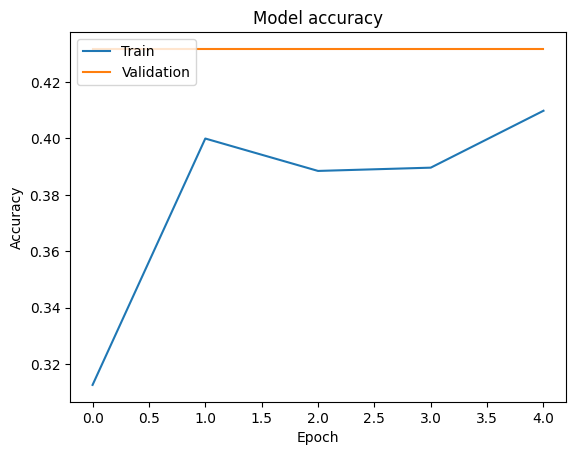

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

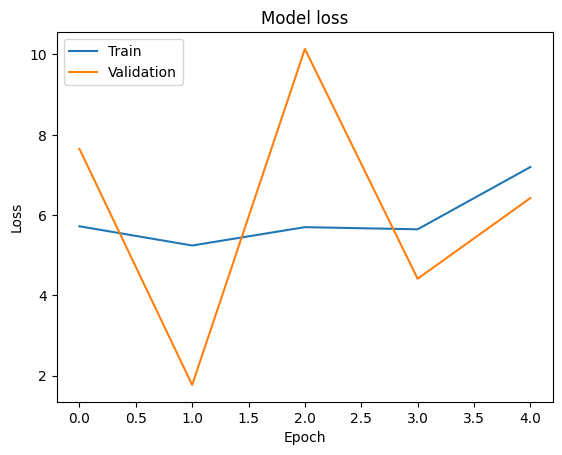

In [32]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [12]:
# Data Augmentation: Increases the diversity of the training data by applying random transformations
# such as rotations, shifts, flips, and zooms to the images during training, helping the model generalize better.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

datagen.fit(X_train)

In [21]:
# Batch Normalization: Normalizes the inputs of each layer to have a mean of zero and a standard deviation of one.
# This helps to stabilize and speed up the training process, and can also act as a regularizer to reduce overfitting.
from tensorflow.keras.layers import BatchNormalization
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs = 3,
    validation_data=(X_test, y_test)
)

Epoch 1/3
593/593 [==============================] - 103s 174ms/step - loss: 1.0113 - accuracy: 0.6338 - val_loss: 64.3811 - val_accuracy: 0.1590
Epoch 2/3
593/593 [==============================] - 114s 192ms/step - loss: 0.9834 - accuracy: 0.6455 - val_loss: 26.8733 - val_accuracy: 0.4693
Epoch 3/3
593/593 [==============================] - 107s 180ms/step - loss: 0.9809 - accuracy: 0.6442 - val_loss: 310.0172 - val_accuracy: 0.1584


In [27]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Validation Accuracy: {accuracy*100:.2f}%')

149/149 [==============================] - 10s 65ms/step - loss: 310.0172 - accuracy: 0.1584
Validation Accuracy: 15.84%


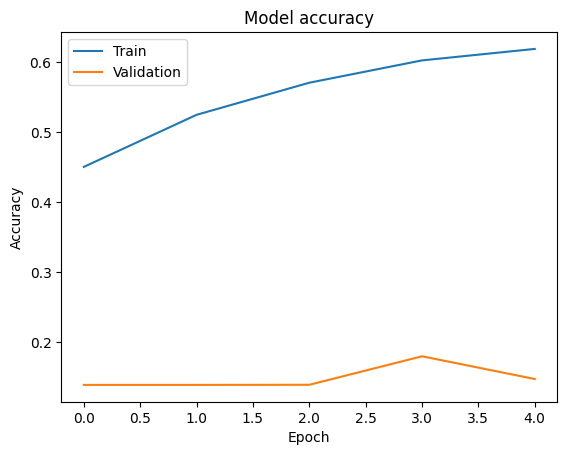

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

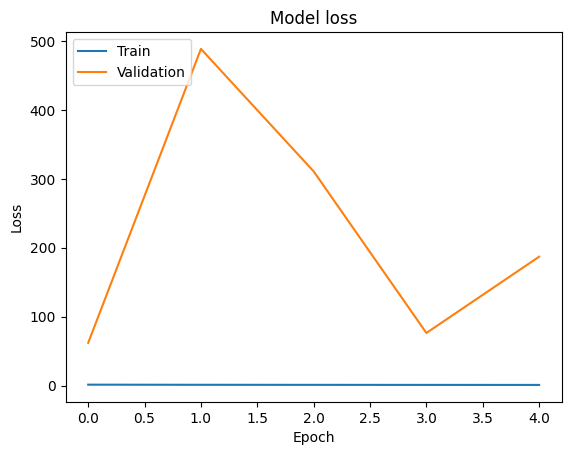

In [25]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [17]:
def create_model():
    model = Sequential([
      Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
      MaxPooling2D(pool_size=(2, 2)),
      Conv2D(64, (3, 3), activation='relu'),
      MaxPooling2D(pool_size=(2, 2)),
      Conv2D(128, (3, 3), activation='relu'),
      MaxPooling2D(pool_size=(2, 2)),
      Flatten(),
      Dense(128, activation='relu'),
      Dropout(0.5),
      Dense(5, activation='softmax')
    ])
    model.compile(optimizer='adam', loss=CategoricalCrossentropy(), metrics=['accuracy'])
    return model

# Number of folds
k = 3

# K-fold cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)
scores = []


for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Normalize the pixel values
    X_train = X_train / 255.0
    X_test = X_test / 255.0

    # Convert labels to categorical
    y_train = to_categorical(y_train, 5)
    y_test = to_categorical(y_test, 5)

    model = create_model()
    model.fit(X_train, y_train, epochs=5, batch_size=32)
    score = model.evaluate(X_test, y_test, verbose=0)
    scores.append(score[1])

# Print average accuracy
print("Average accuracy:", np.mean(scores))

Epoch 1/5
494/494 [==============================] - 54s 106ms/step - loss: 1.2394 - accuracy: 0.5230
Epoch 2/5
494/494 [==============================] - 57s 116ms/step - loss: 0.9354 - accuracy: 0.6672
Epoch 3/5
494/494 [==============================] - 59s 120ms/step - loss: 0.8423 - accuracy: 0.7021
Epoch 4/5
494/494 [==============================] - 54s 110ms/step - loss: 0.7846 - accuracy: 0.7282
Epoch 5/5
494/494 [==============================] - 56s 113ms/step - loss: 0.7337 - accuracy: 0.7434
Epoch 1/5
494/494 [==============================] - 59s 115ms/step - loss: 1.2508 - accuracy: 0.5209
Epoch 2/5
494/494 [==============================] - 55s 111ms/step - loss: 0.9348 - accuracy: 0.6677
Epoch 3/5
494/494 [==============================] - 53s 108ms/step - loss: 0.8372 - accuracy: 0.7082
Epoch 4/5
494/494 [==============================] - 54s 109ms/step - loss: 0.7712 - accuracy: 0.7363
Epoch 5/5
494/494 [==============================] - 57s 115ms/step - loss: 0.7148

In [18]:
def create_model():
    model = Sequential([
      Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
      MaxPooling2D(pool_size=(2, 2)),
      Conv2D(64, (3, 3), activation='relu'),
      MaxPooling2D(pool_size=(2, 2)),
      Conv2D(128, (3, 3), activation='relu'),
      MaxPooling2D(pool_size=(2, 2)),
      Flatten(),
      Dense(128, activation='relu'),
      Dropout(0.5),
      Dense(5, activation='softmax')
    ])
    model.compile(optimizer='adam', loss=CategoricalCrossentropy(), metrics=['accuracy'])
    return model

In [19]:
# Number of folds
k = 3

# K-fold cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)
cv_scores = []

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val = X_train[train_index], X_train[val_index]
    y_train_fold, y_val = y_train[train_index], y_train[val_index]

    model = create_model()  # Define your model creation function
    model.fit(X_train_fold, y_train_fold, epochs=5, batch_size=32, verbose=0)
    val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
    cv_scores.append(val_acc)

# Train the final model on the entire training set
final_model = create_model()
final_model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0)

# Evaluate the final model on the test set
test_loss, test_acc = final_model.evaluate(X_test, y_test, verbose=0)

print("Average CV accuracy:", np.mean(cv_scores))
print("Test accuracy:", test_acc)

Average CV accuracy: 0.7329157193501791
Test accuracy: 0.7475003004074097
